In [2]:
from pylab import *
from scipy.special import binom
%matplotlib inline

Consider the following reaction sequence:
$$
\begin{array}{rcl}
R_0 + C & \rightleftharpoons & R_1, \\
R_1 + C & \rightleftharpoons & R_2, \\
 & \vdots & \\
R_{n-1} + C & \rightleftharpoons & R_n, \\
2 R_n & \rightleftharpoons & R_D.
\end{array}
$$

After analyzing the stationary chemical kinetics we obtain:
$$
\begin{array}{rcl}
R_i & = & R_0 \left({n \atop i}\right) \left(\frac{C}{K_C}\right)^i, \\
R_D & = & \frac{R_0^2}{K_D} \left(\frac{C}{K_C}\right)^{2n}.
\end{array}
$$
By imposing the condition
$$
\sum_{i=0}^n R_i + 2 R_D = R_T,
$$
we obtain
\begin{array}{rcl}
\frac{R_0}{R_T} & = & \frac{K_D}{4 R_T} \left[ \sqrt{\left( \frac{1 + C/K_C}{(C / K_C)^2} \right)^{2n} + \frac{8 R_T}{K_D} \frac{1}{(C / K_C)^{2n}} } - \left( \frac{1 + C/K_C}{(C / K_C)^2} \right)^{n} \right], \\
\frac{R_i}{R_T} & = & \frac{R_0}{R_T} \left({n \atop i}\right) \left(\frac{C}{K_C}\right)^i, \\
\frac{R_D}{R_T} & = & \frac{R_0^2}{K_D R_T} \left(\frac{C}{K_C}\right)^{2n}.
\end{array}
In the above equations, $K_C$ and $K_D$ are respectively the dissociation constants for calcium binding and receptor dimerizations.

From the above results, the total amount of bound calcium (normalizad to the total receptor monomer concentracion) can be computed as:
$$
\frac{C_B}{R_T} = \sum_{i = 0}^n i \frac{R_i}{R_T} + (2n + m) \frac{R_D}{R_T},
$$
were $m$ is the number of extra calcium ions trapped during the formation of a receptor dimer.

In order to simplify the notation, let us define
$$
\begin{array}{rcl}
r_i & = & R_i / R_T,\\
r_D & = & R_D / R_T, \\
c_B & = & C_B / R_T, \\
k_D & = & K_D / R_T, \\
c & = & C / K_C.
\end{array}
$$
With these definitions, or results can be rewritten as
$$
\begin{array}{rcl}
r_0 & = & \big( k_D / 4 \big) \left[ \sqrt{\big( (1 + c) / c^2 \big)^{2n} + 8 / \big(k_D c^{2n}\big)} - \big( (1 + c) / c^2 \big)^n \right],\\
r_i & = & r_0 \left({n \atop i}\right) c^i,\\
r_D & = & r_0^2 c^{2n} / k_D, \\
c_B & = & \sum_{i = 0}^n i r_i + (2n + m) r_D.
\end{array}
$$
It can be shown by expanding in Taylor series and cutting at first order that
$$
\begin{array}{rcl}
r_0 & \approx & 1 / (1 + c)^n,\\
r_i & \approx & r_0 \left({n \atop i}\right) c^i,\\
r_D & \approx & 0, \\
c_B & \approx & \sum_{i = 0}^n i r_i,
\end{array}
$$
when $k_D \gg 1$


In [3]:
def boundCalcium(c):
    r = zeros(n + 2)
    r[0] = kd / 4 * (sqrt(((1 + c *Kc) / (c*Kc)**2)**(2 * n) + 8 / (kd * (c*Kc)**(2 * n))) - ((1 + c*Kc) / (c*Kc)**2)**n )
    for i in range(1, n + 1):
        r[i] = r[0] * binom(n, i) * (c*Kc)**i
    r[n + 1] = r[0]**2 * (c*Kc)**(2 * n) / kd
    return sum(arange(n + 1) * r[:-1]) + (2 * n + m) * r[n + 1]

[0, 10, 0, 30]

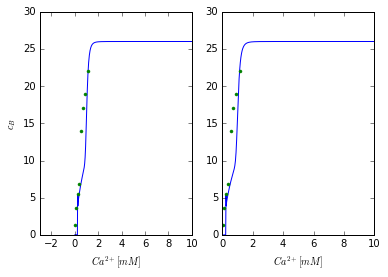

In [16]:
n = 20
m = 12
kd = .000000000002
Kc = .2
c = linspace(.02,100,1000)
cb = zeros(1000)
for i in range(1000):
    cb[i] = boundCalcium(c[i])
x = [0.051, 0.145, 0.27, 0.37, 0.57, 0.73, 0.91, 1.165]
y = [1.4, 3.6, 5.5, 6.8, 14., 17., 19., 22.]
subplot(1,2,1)
plot(Kc*c, cb)
plot(x, y, '.')
xlabel(r'$Ca^{2+}[mM]$')
ylabel(r'$c_B$')
axis([-3, 10, 0, 30])
subplot(1,2,2)
plot(Kc*c, cb)
plot(x, y, '.')
xlabel(r'$Ca^{2+}[mM]$')
axis([0, 10, 0, 30])

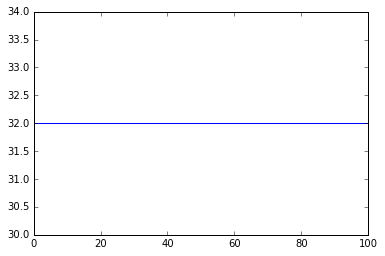

In [4]:
n = 25
m = 30
c = linspace(.01,100,1000)
cb = (4 * n + m) * 1/4 * c**0
plot(c,cb)